In [1]:
import numpy as np
from matplotlib import pylab as plt
import PIL

In [2]:
import copy

def thickening_operation(X, border, A):
    shifts = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    new_border = copy.deepcopy(border)
    for point in border:
        is_valid = True
        for movement in A:
            check_point = (point[0] + movement[0], point[1] + movement[1])
            if check_point not in X:
                is_valid = False
                break
        if is_valid:
            del new_border[point]
            for shift in shifts:
                new_point = (point[0] + shift[0], point[1] + shift[1])
                if new_point in X or new_point in new_border:
                    continue
                new_border[new_point] = 0
            X[point] = 0
    return X, new_border

In [3]:
def build_convex_hull(data):
    templates = [
        [(0, 1), (-1, -1), (-1, 0), (-1, 1)],
        [(-1, 0), (-1, -1), (0, -1), (1, -1)],
        [(0, -1), (1, -1), (1, 0), (1, 1)],
        [(1, 0), (-1, 1), (0, 1), (1, 1)],
        [(0, -1), (-1, -1), (-1, 0), (-1, 1)],
        [(1, 0), (-1, -1), (0, -1), (1, -1)],
        [(0, 1), (1, -1), (1, 0), (1, 1)],
        [(-1, 0), (-1, 1), (0, 1), (1, 1)]
    ]
    
    height, width = data.shape[0], data.shape[1]
    
    points = {(i, j): 0 for i in range(height) for j in range(width) if not data[i, j]}
    border = {}
    
    shifts = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    
    for point in points.keys():
        for shift in shifts:
            new_point = (point[0] + shift[0], point[1] + shift[1])
            if new_point in points or new_point in border:
                continue
            border[new_point] = 0

    while True:
        new_points = copy.deepcopy(points)
        for template in templates:
            new_points, border = thickening_operation(new_points, border, template)
        if points == new_points:
            break
        points = new_points
        print(len(points.keys()))

    return points

In [16]:
import cv2

image_1 = cv2.imread('circle.png', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('rect_ov_1.png', cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread('heart_1.png', cv2.IMREAD_GRAYSCALE)

convex = build_convex_hull(image_1)

79299
79786
80291
80771
81236
81659
82031
82336
82655
82933
83090
83210
83293
83337
83350
83352


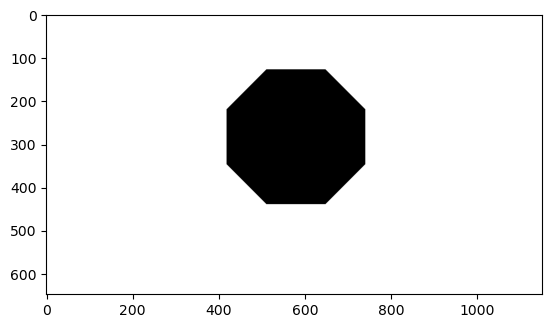

In [17]:
nx, ny = image_2.shape
a = np.ones((nx, ny), dtype=bool)

for i in range(nx):
    for j in range(ny):     
        a[i, j] = (i, j) not in convex

plt.imshow(a, cmap='gray')